# <a id='1'> Let's import our Libraries </a>

In [1]:
#Importing libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# Input data files are available in the "../input/" directory.
import os
import matplotlib.pyplot as plt#visualization
from PIL import  Image
%matplotlib inline
import pandas as pd
import seaborn as sns#visualization
import itertools
import warnings
warnings.filterwarnings("ignore")
import io
import plotly.offline as py#visualization
py.init_notebook_mode(connected=True)#visualization
import plotly.graph_objs as go#visualization
import plotly.tools as tls#visualization
import plotly.figure_factory as ff#visualization

import warnings
import pandas as pd
warnings.simplefilter('always')

# <a id='1'> Let's read our csv dataset </a>

In [2]:
df_train = pd.read_csv(r"lead_qualification_history.csv", sep=',') 
pd.set_option('display.max_columns', None)

In [3]:
df_test = pd.read_csv("lead_qualification_PredictMe.csv", sep=',') 
pd.set_option('display.max_columns', None)

In [4]:
df_train.head()

,OutreachAttempts,InitialContact,Title,SpendRatio,DealSize,LeadSource,ExistingCustomer,Region,CampaignMix,OppStatus
0,9,No,Manager,0.47,8700,Internet,No,SE Asia,None,yes
1,8,Yes,Executive,0.35,10300,Internet,No,Europe,Trial,no
2,8,Yes,Executive,0.17,6000,Phone,No,Other,Digital|Traditional|Trial,yes
3,2,No,Manager,0.23,15200,Walkin,Yes,Americas,None,no
4,4,Yes,Other,0.34,8400,Phone,No,Other,Digital|Trial,yes


# <a id='1'> EDA - Exploratory Data Analysis </a>

In [5]:
print("Q: Are there any missing values?", "\n" +
      "A: {}".format(df_train.isnull().values.any()))

Q: Are there any missing values? 
A: False


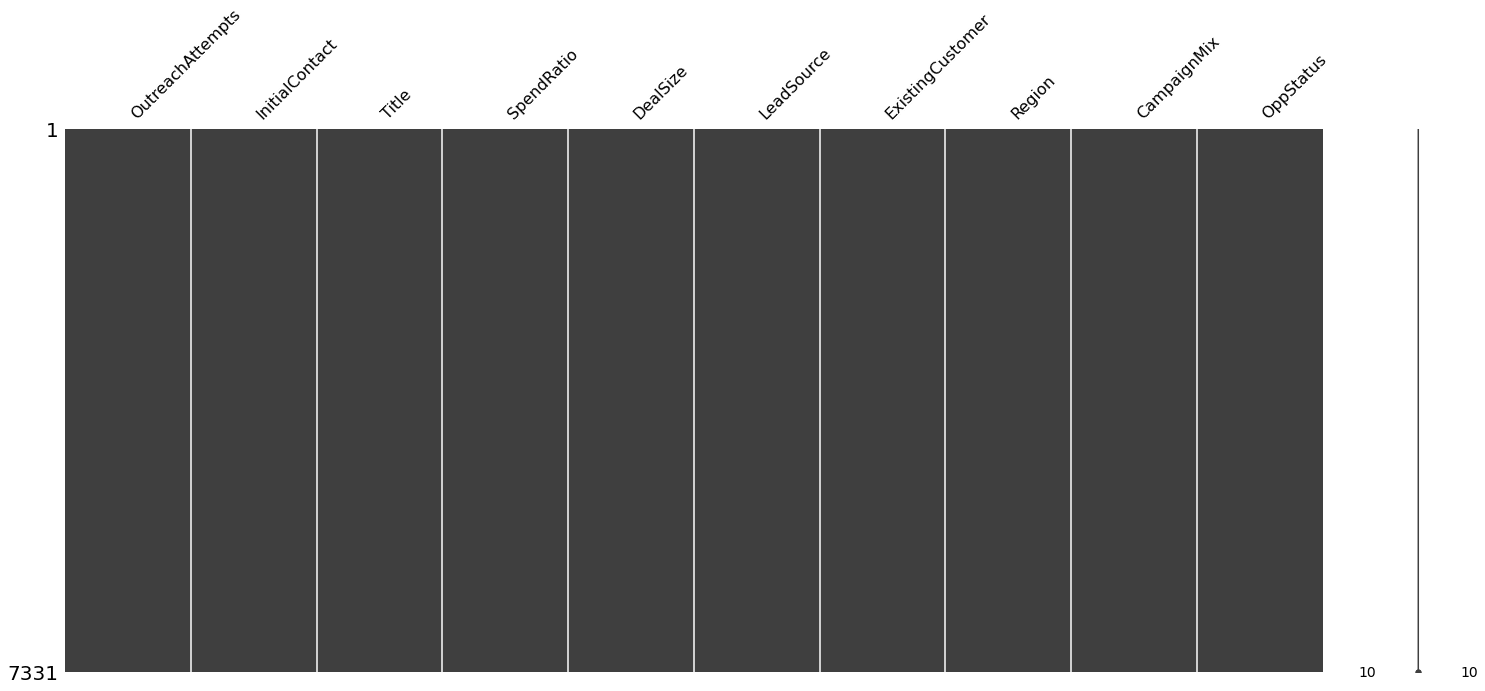

In [6]:
import missingno as msno  # to visually check missing numbers/values.
msno.matrix(df_train);

In [7]:
print ("Rows     : " ,df_train.shape[0])
print ("Columns  : " , format(df_train.shape[1])+"\n")
print ("Features : \n" , format(df_train.columns.tolist())+"\n\n")
print ("Missing values :  ", format(df_train.isnull().sum().values.sum())+"\n\n")
print ("Unique values :\n \n{}% ".format(df_train.nunique()))

Rows     :  7331
Columns  :  10

Features : 
 ['OutreachAttempts', 'InitialContact', 'Title', 'SpendRatio', 'DealSize', 'LeadSource', 'ExistingCustomer', 'Region', 'CampaignMix', 'OppStatus']


Missing values :   0


Unique values :
 
OutreachAttempts      9
InitialContact        2
Title                 3
SpendRatio           58
DealSize            111
LeadSource            4
ExistingCustomer      2
Region                5
CampaignMix           8
OppStatus             2
dtype: int64% 


# <a id='1'> All columns(df_train) by unique </a>

In [8]:
for name in df_train.columns:
    print(name)
    print(df_train[name].unique())
    print( )

OutreachAttempts
[ 9  8  2  4  6  5  3  7 10]

InitialContact
['No' 'Yes']

Title
['Manager' 'Executive' 'Other']

SpendRatio
[0.47 0.35 0.17 0.23 0.34 0.36 0.15 0.6  0.53 0.22 0.56 0.25 0.21 0.44
 0.42 0.32 0.12 0.33 0.45 0.31 0.54 0.58 0.26 0.38 0.37 0.28 0.13 0.27
 0.4  0.29 0.2  0.06 0.43 0.41 0.59 0.48 0.16 0.19 0.05 0.46 0.62 0.14
 0.51 0.55 0.24 0.5  0.1  0.3  0.39 0.18 0.49 0.52 0.11 0.61 0.07 0.08
 0.09 0.57]

DealSize
[ 8700 10300  6000 15200  8400  6100  7600  9200 10500  6900 14400 15000
 11300 11000 11700 15700  8000  5000 10100 14800 15600 10200  8500  6300
 14000  7300 15300  6800  8100  9700 13100 14300  9500 12400 14500 11500
  7200  7800 14900 12200 11900  7000  8600 10800  8800 12100  5900 14100
  7700 15500 13400 11800  8900 12500 12900 14200  5300 14700  6200 12800
  5600 10400  6500  5200  9400 11600 10600  9800 15400 10000  7500 12000
 12300  9100 13500  9600 13800 14600 12700 11200 11100 13700  7400 10700
 13900  5700 13200  7900 16000 13300  8200  9000  9300  7

# <a id='1'> All columns(df_train) by value_counts </a>

In [9]:
for name in df_train.columns:
    print(name)
    print(df_train[name].value_counts())
    print( )

OutreachAttempts
9     997
5     992
6     982
7     970
4     942
8     937
2     580
3     534
10    397
Name: OutreachAttempts, dtype: int64

InitialContact
No     3849
Yes    3482
Name: InitialContact, dtype: int64

Title
Executive    2709
Manager      2650
Other        1972
Name: Title, dtype: int64

SpendRatio
0.52    172
0.50    171
0.25    163
0.22    161
0.45    160
0.34    159
0.44    158
0.54    156
0.35    156
0.32    156
0.53    154
0.51    154
0.20    154
0.23    150
0.21    149
0.15    148
0.16    147
0.49    145
0.27    144
0.18    143
0.17    143
0.19    141
0.14    140
0.13    140
0.33    140
0.31    140
0.37    138
0.48    138
0.36    138
0.38    138
0.43    135
0.41    135
0.47    135
0.28    133
0.40    133
0.42    133
0.24    131
0.26    130
0.12    130
0.39    129
0.30    124
0.55    122
0.29    120
0.46    117
0.60    107
0.62     98
0.58     94
0.61     90
0.56     84
0.57     78
0.59     76
0.09     64
0.08     62
0.10     60
0.06     58
0.05     54
0.11     5

In [10]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
OutreachAttempts,7331.0,6.085254,2.301779,2.00,4.00,6.00,8.00,10.00
SpendRatio,7331.0,0.343975,0.152250,0.05,0.21,0.34,0.48,0.62
DealSize,7331.0,10617.514664,2950.506491,5000.00,8100.00,10600.00,13200.00,16000.00


In [11]:
def grep_year(x):
    x = x.replace("|", ",")
    return x

In [12]:
df_train['CampaignMix'] = df_train['CampaignMix'].apply(grep_year)

In [13]:
df_train.sample(5)

,OutreachAttempts,InitialContact,Title,SpendRatio,DealSize,LeadSource,ExistingCustomer,Region,CampaignMix,OppStatus
1382,7,Yes,Executive,0.52,6500,Other,No,SE Asia,"Traditional,Trial",yes
5674,4,Yes,Other,0.51,13100,Internet,Yes,Australia,None,no
608,4,Yes,Manager,0.10,7400,Internet,No,Other,Traditional,yes
3191,3,Yes,Other,0.46,8100,Other,No,Europe,None,no
5522,5,No,Manager,0.37,6800,Walkin,No,Europe,None,no


# <a id='1'> Overall Summary of EDA (Exploratory Data Analysis) </a>

In [14]:
from xplore.data import xplore
xplore(df_train)

------------------------------------
The fist 5 entries of your dataset are:

   OutreachAttempts InitialContact      Title  SpendRatio  DealSize  \
0                 9             No    Manager        0.47      8700   
1                 8            Yes  Executive        0.35     10300   
2                 8            Yes  Executive        0.17      6000   
3                 2             No    Manager        0.23     15200   
4                 4            Yes      Other        0.34      8400   

  LeadSource ExistingCustomer    Region                CampaignMix OppStatus  
0   Internet               No   SE Asia                       None       yes  
1   Internet               No    Europe                      Trial        no  
2      Phone               No     Other  Digital,Traditional,Trial       yes  
3     Walkin              Yes  Americas                       None        no  
4      Phone               No     Other              Digital,Trial       yes  


-------------------


Your Report has been generated and saved as 'output.html'


# <a id='1'> Data Visualization </a>

In [15]:
# function to put DealSize into a gropping range.
def Deal_Size(df_train):
    
    if df_train['DealSize'] <= 5000:
        return "DealSize_0-5000"
    elif (df_train['DealSize'] > 5000) & (df_train['DealSize'] <= 10000):
        return "DealSize_5000-10000"
    elif (df_train['DealSize'] > 10000) & (df_train['DealSize'] <= 15000):
        return "DealSize_10000-15000"
    elif df_train['DealSize'] > 15000:
        return "DealSize_above_15000"
df_train["DealSize_group"] = df_train.apply(lambda df_train: Deal_Size(df_train),
                                      axis = 1)

# Separating opportunity and no opportunity status.
yes_OppStatus = df_train[df_train["OppStatus"] == "yes"]
print("The shape of the OppStatus, which is YES only: ", yes_OppStatus.shape)

no_OppStatus = df_train[df_train["OppStatus"] == "no"]
print("The shape of the OppStatus, which is NO only: ", no_OppStatus.shape)

#Separating catagorical and numerical columns
target_col = ["OppStatus"]
cat_cols   = df_train.nunique()[df_train.nunique() < 6].keys().tolist()
cat_cols   = [x for x in cat_cols if x not in target_col]
num_cols   = [x for x in df_train.columns if x not in cat_cols + target_col]

The shape of the OppStatus, which is YES only:  (2749, 11)
The shape of the OppStatus, which is NO only:  (4582, 11)


# Opportunity Status 

In [16]:
#labels
lab = df_train['OppStatus'].value_counts().keys().tolist()
#values
val = df_train['OppStatus'].value_counts().values.tolist()

trace = go.Pie(labels = lab,
               values = val,
               marker = dict(colors = ['royalblue', 'lime'],
                            line= dict(color = "white",
                                       width = 1.3)
                            ),
               rotation = 90,
               hoverinfo = "label+value+text",
               hole = .5
              )
layout = go.Layout(dict(title= "Opportunity Status",
                        plot_bgcolor  = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)", 
                       )
                  )

data = [trace]
fig = go.Figure(data = data, layout = layout)
py.iplot(fig)

# Opportunity Status versus The Variable distribution/Various columns

In [17]:
#function  for pie plot for opportunity status types
def plot_pie(column) :
    
    
    trace1 = go.Pie(values  = yes_OppStatus[column].value_counts().values.tolist(),
                    labels  = yes_OppStatus[column].value_counts().keys().tolist(),
                    hoverinfo = "label+percent+name",
                    domain  = dict(x = [0, .48]),
                    name    = "Opportunity status",
                    marker  = dict(line = dict(width = 2,
                                               color = "rgb(243,243,243)")
                                  ),
                    hole    = .6
                   )
    trace2 = go.Pie(values  = no_OppStatus[column].value_counts().values.tolist(),
                    labels  = no_OppStatus[column].value_counts().keys().tolist(),
                    hoverinfo = "label+percent+name",
                    marker  = dict(line = dict(width = 2,
                                               color = "rgb(243,243,243)")
                                  ),
                    domain  = dict(x = [.52, 1]),
                    hole    = .6,
                    name    = "No opportunity status" 
                   )
    
    layout = go.Layout(dict(title = column + " distribution of opportunity status ",
                            plot_bgcolor  = "rgb(243,243,243)",
                            paper_bgcolor = "rgb(243,243,243)",
                            annotations = [dict(text = "Opportunity status",
                                                font = dict(size = 13),
                                                showarrow = False,
                                                x = .15, y = .5),
                                           dict(text = "No Opportunity status",
                                                font = dict(size = 13),
                                                showarrow = False,
                                                x = .88, y = .5
                                               )
                                          ]
                           )
                      )
    data = [trace1,trace2]
    fig  = go.Figure(data = data,layout = layout)
    py.iplot(fig)

    
#function  for histogram for Opportunity status types
def histogram(column) :
    trace1 = go.Histogram(x  = yes_OppStatus[column],
                          histnorm= "percent",
                          name = "Opportunity status",
                          marker = dict(line = dict(width = .5,
                                                    color = "black"
                                                    )
                                        ),
                         opacity = .9 
                         ) 
    
    trace2 = go.Histogram(x  = no_OppStatus[column],
                          histnorm = "percent",
                          name = "No opportunity status",
                          marker = dict(line = dict(width = .5,
                                              color = "black"
                                             )
                                 ),
                          opacity = .9
                         )
    
    data = [trace1,trace2]
    layout = go.Layout(dict(title =column + " distribution of opportunity status ",
                            plot_bgcolor  = "rgb(243,243,243)",
                            paper_bgcolor = "rgb(243,243,243)",
                            xaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                             title = column,
                                             zerolinewidth=1,
                                             ticklen=5,
                                             gridwidth=2
                                            ),
                            yaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                             title = "percent",
                                             zerolinewidth=1,
                                             ticklen=5,
                                             gridwidth=2
                                            ),
                           )
                      )
    
    fig  = go.Figure(data=data,layout=layout)
    
    py.iplot(fig)   

    
    
#function  for scatter plot matrix  for numerical columns in data
def scatter_matrix(df_train)  :
    
    df_train  = df_train.sort_values(by = "OppStatus", ascending = True)
    classes = df_train["OppStatus"].unique().tolist()
    classes
    
    class_code  = {classes[k] : k for k in range(2)}
    class_code

    color_vals = [class_code[cl] for cl in df_train["OppStatus"]]
    color_vals

    pl_colorscale = "Portland"

    pl_colorscale

    text = [df_train.loc[k,"OppStatus"] for k in range(len(df_train))]
    text

    trace = go.Splom(dimensions = [dict(label  = 'OutreachAttempts',          # Splom -- Scatterplot Matrix in plotly
                                       values = df_train['OutreachAttempts']),
                                   dict(label  = 'DealSize',
                                       values = df_train['DealSize']),
                                   dict(label  = 'SpendRatio',
                                       values = df_train['SpendRatio']),
                                   ],
                     text = text,
                     marker = dict(color = color_vals,
                                   colorscale = pl_colorscale,
                                   size = 3,
                                   showscale = False,
                                   line = dict(width = .1,
                                               color='rgb(230,230,230)'
                                              )
                                  )
                    )
    axis = dict(showline  = True,
                zeroline  = False,
                gridcolor = "#fff",
                ticklen   = 4
               )
    
    layout = go.Layout(dict(title  = 
                            "Scatter plot matrix for Numerical columns for Opportunity Status",
                            autosize = False,
                            height = 800,
                            width  = 800,
                            dragmode = "select",
                            hovermode = "closest",
                            plot_bgcolor  = 'rgba(240,240,240, 0.95)',
                            xaxis1 = dict(axis),
                            yaxis1 = dict(axis),
                            xaxis2 = dict(axis),
                            yaxis2 = dict(axis),
                            xaxis3 = dict(axis),
                            yaxis3 = dict(axis),
                           )
                      )
    data   = [trace]
    fig = go.Figure(data = data,layout = layout )
    py.iplot(fig)

    
    
#for all categorical columns plot pie
for i in cat_cols :
    plot_pie(i)

#for all categorical columns plot histogram    
for i in num_cols :
    histogram(i)

#scatter plot matrix
scatter_matrix(df_train)     

# <a id='4'> Analysis on Visualizations </a>

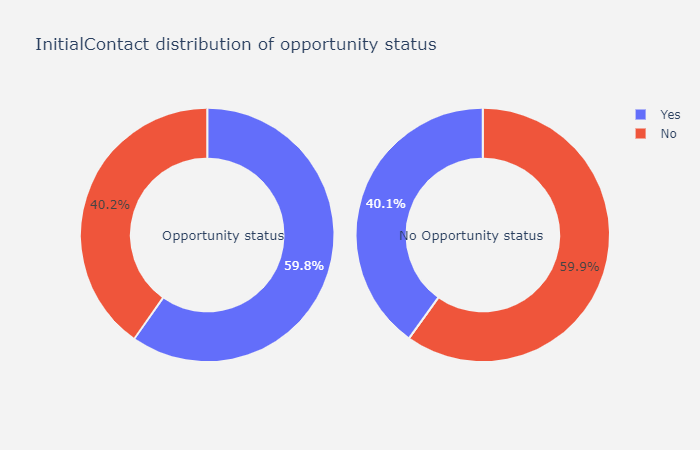

        From the diagram above:
    
                    InitialContact based on the distribution of opportunity status, having Opportunity Status 
                                * YES - is 59.8 %
                                *  NO - is 40.2 %  
            whereas;

                    Having No Opportunity Status:
                                * YES - is 59.9 %
                                *  NO - is 40.1 %

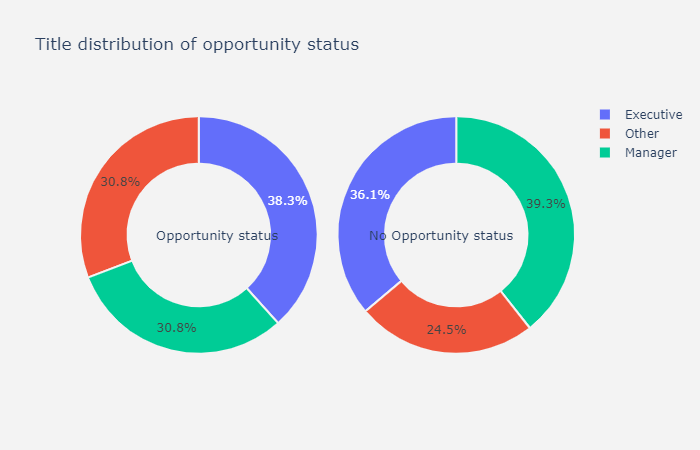

                From the diagram above:

                        Title based on the distribution of opportunity status, having Opportunity Status 
                                * EXPENSIVE - is 38.3 %
                                *   MANAGER - is 30.8 %
                                *     OTHER - is 30.8 %  
                whereas;

                        Having No Opportunity Status:
                                * EXPENSIVE - is 36.1 %
                                *   MANAGER - is 39.3 %
                                *     OTHER - is 24.5 %

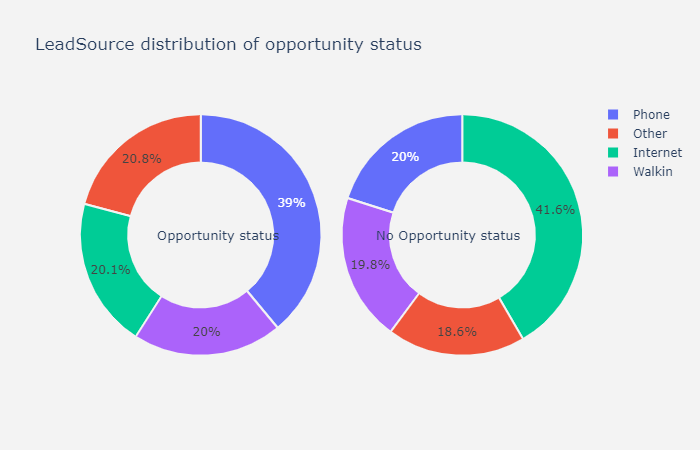

                From the diagram above:

                        Title based on the distribution of opportunity status, having Opportunity Status 
                                *    PHONE - is 39 %
                                * INTERNET - is 20.1 %
                                *  WALKING - is 20 % 
                                *    OTHER - is 20.8 %
                    whereas;

                        Having No Opportunity Status:
                                *    PHONE - is 20 %
                                * INTERNET - is 41.6 %
                                *  WALKING - is 19.8 % 
                                *    OTHER - is 18.6 %
                   
                   -This continues through the rest of the variable distributions on the dataset. 

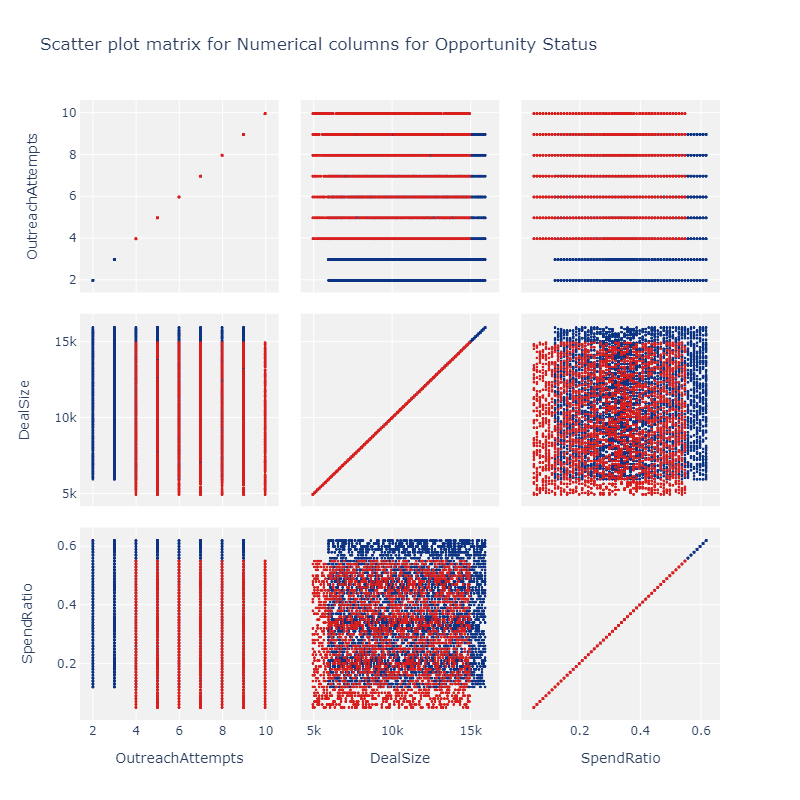

            From the diagram above:

              Scatter plot matrix for Numerical columns for Opportunity Status, 
                * There is a positive, strong, linear relationship between OutreachAttempts, DealSize, SpendRatio.
                * There is a positive, weak, non-linear relationship between DealSize & SpendRatio.
                * There is no associaiton between OutreachAttempts & SpendRatio, OutreachAttempts & DealSize.